In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

In [50]:
data = pd.read_csv(r"C:\Users\shakir.ahmed\Desktop\Decision tree\emp_data_decision_tree.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'cen

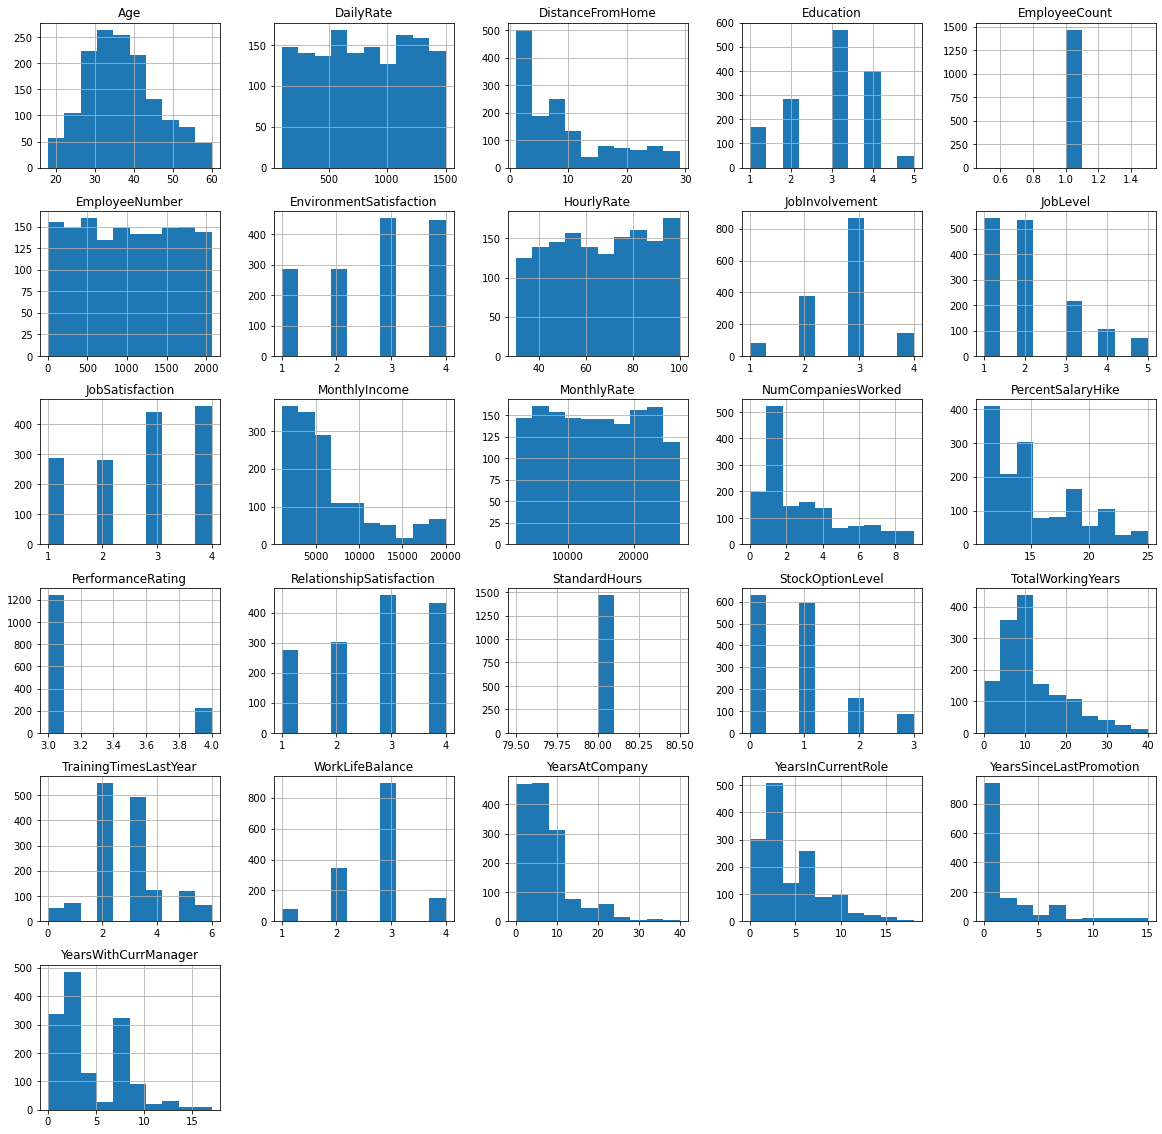

In [19]:
data.hist(figsize = (20,20))

In [49]:
data.select_dtypes("object")

,Attrition,BusinessTravel,Department,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Male,Sales Executive,Married,Y,No


In [57]:
data.select_dtypes("object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [61]:
from sklearn.preprocessing import LabelEncoder

Laben = LabelEncoder()

data["BusinessTravel"] = Laben.fit_transform(data["BusinessTravel"])
data["Department"] = Laben.fit_transform(data["Department"])
data["EducationField"] = Laben.fit_transform(data["EducationField"])
data["Gender"] = Laben.fit_transform(data["Gender"])
data["JobRole"] = Laben.fit_transform(data["JobRole"])
data["MaritalStatus"] = Laben.fit_transform(data["MaritalStatus"])
data["Over18"] = Laben.fit_transform(data["Over18"])
data["OverTime"] = Laben.fit_transform(data["OverTime"])

In [64]:
x = data.drop(columns = ["Attrition"])
y = data["Attrition"]

In [66]:
scalar = StandardScaler()
X_transform = scalar.fit_transform(x)

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X_transform, y, test_size = 0.25, random_state = 355)

In [70]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [71]:
clf.score(x_train, y_train)

1.0

In [72]:
clf.score(x_test, y_test)

0.7989130434782609

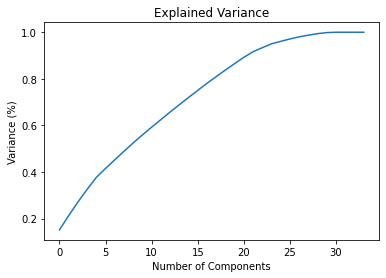

In [73]:
pca = PCA()
pca.fit_transform(X_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [79]:
pca = PCA(n_components=30)
new_data = pca.fit_transform(X_transform)
principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20','PC-21','PC-22','PC-23','PC-24','PC-25','PC-26','PC-27','PC-28','PC-29','PC-30'])

In [80]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-21,PC-22,PC-23,PC-24,PC-25,PC-26,PC-27,PC-28,PC-29,PC-30
0,-0.392964,0.236304,-1.775739,1.984536,0.974460,1.314296,-2.665549,-0.077257,0.217668,-3.209070,...,0.810909,1.651030,-0.210440,-0.811698,0.366414,-0.337741,-0.146610,-0.382603,-0.465175,-0.612037
1,0.578933,-1.302801,2.953643,0.759909,-0.003700,1.192379,0.729243,0.714360,-0.326259,1.059381,...,-0.148088,0.235740,-1.984705,0.243410,0.032615,0.716657,0.200877,0.003354,-0.560745,-0.414517
2,-2.464301,1.229835,-0.328673,1.069394,-1.285547,1.403253,0.092819,-2.318801,0.245875,-0.079179,...,-0.726590,1.518379,0.066115,0.101053,0.470764,-0.315287,-0.119539,0.251416,0.120495,-0.012093
3,-0.859846,-0.495665,-1.220481,-0.055405,-0.405273,2.111816,-0.685153,-0.359813,0.734064,-0.083535,...,-1.673394,-0.238331,0.177661,0.452489,-0.925610,0.270893,1.179698,-0.589360,0.446523,-0.079509
4,-1.835542,1.256571,-0.559648,-0.313244,-1.024512,0.610879,0.478300,-1.445889,-1.167444,0.764610,...,0.659885,2.216127,0.815696,-0.619726,0.361295,-0.332830,-0.063294,-0.271599,0.098690,0.017371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.720207,0.993720,0.572718,-0.606436,-0.498370,0.140469,-0.001767,0.562611,-0.310533,1.155256,...,1.258474,0.791513,-0.392744,-0.121275,0.171581,-0.274991,-0.326733,0.353145,0.861186,0.613774
1466,0.910277,0.537705,0.152415,-0.891703,-1.316752,-0.615981,3.698229,0.370553,0.787318,-0.551805,...,-0.462781,1.087228,-0.393971,-0.825223,0.522222,-0.721020,0.089414,0.512002,-0.901084,-0.303504
1467,-1.242814,-0.102239,2.553505,0.120492,0.128495,-1.241851,-1.665478,0.973739,1.083647,0.185093,...,0.215647,-0.543692,0.603959,-0.492486,-0.021777,-0.026567,-0.139884,-0.693302,0.032651,-0.288400
1468,0.896712,-0.715264,-1.133433,0.407253,0.636058,-0.168760,0.335206,0.121007,-0.002530,1.234701,...,0.403478,-0.716878,-2.030969,-0.084282,-0.509125,-0.516046,-0.246616,0.062805,-0.151599,0.326941


In [81]:
x_train, x_test, y_train, y_test = train_test_split(principal_x, y, test_size = 0.25, random_state = 355)

In [82]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [110]:
clf.score(x_test, y_test)

0.845108695652174

In [111]:
x_train, x_test, y_train, y_test = train_test_split(X_transform, y, test_size = 0.30, random_state = 355)

In [112]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [113]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [114]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                              min_samples_leaf=7,
                                              min_samples_split=6,
                                              splitter='random'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [115]:
best_parameters = grid_search.best_params_
best_parameters

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'splitter': 'random'}

In [116]:
grid_search.best_score_

0.8620269950272318

In [117]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =3, min_samples_leaf= 7, min_samples_split= 6, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=7,
                       min_samples_split=6, splitter='random')

In [118]:
clf.score(x_test, y_test)

0.8571428571428571

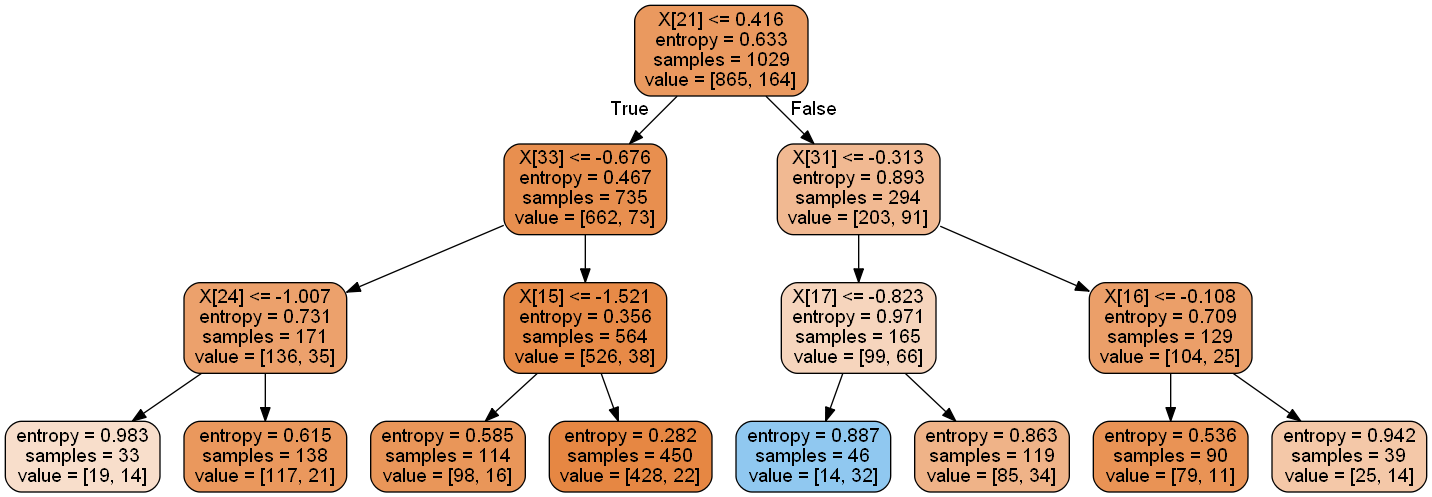

In [119]:
feature_name=list(x.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("tree.png")
#Show graph
Image(graph.create_png())